In [3]:
import os 
import matplotlib
import matplotlib.pyplot as plt 
import pandas as pd
from scipy.stats import chi2_contingency
import seaborn as sns
import pickle

In [15]:
#Load the pickle files
import pickle 
with open('day2results_may10.pkl', 'rb') as f:
    day2results = pickle.load(f)

with open('day6results_may10.pkl', 'rb') as f:
    day6results = pickle.load(f)

with open('day7results_april27.pkl', 'rb') as f:
    day7results = pickle.load(f)

with open('day9results_april27.pkl', 'rb') as f:
    day9results = pickle.load(f)

In [5]:
certain_thresh = 0.999
certainnot_thresh = 0.001

Text(0.5, 0.98, 'Day 2')

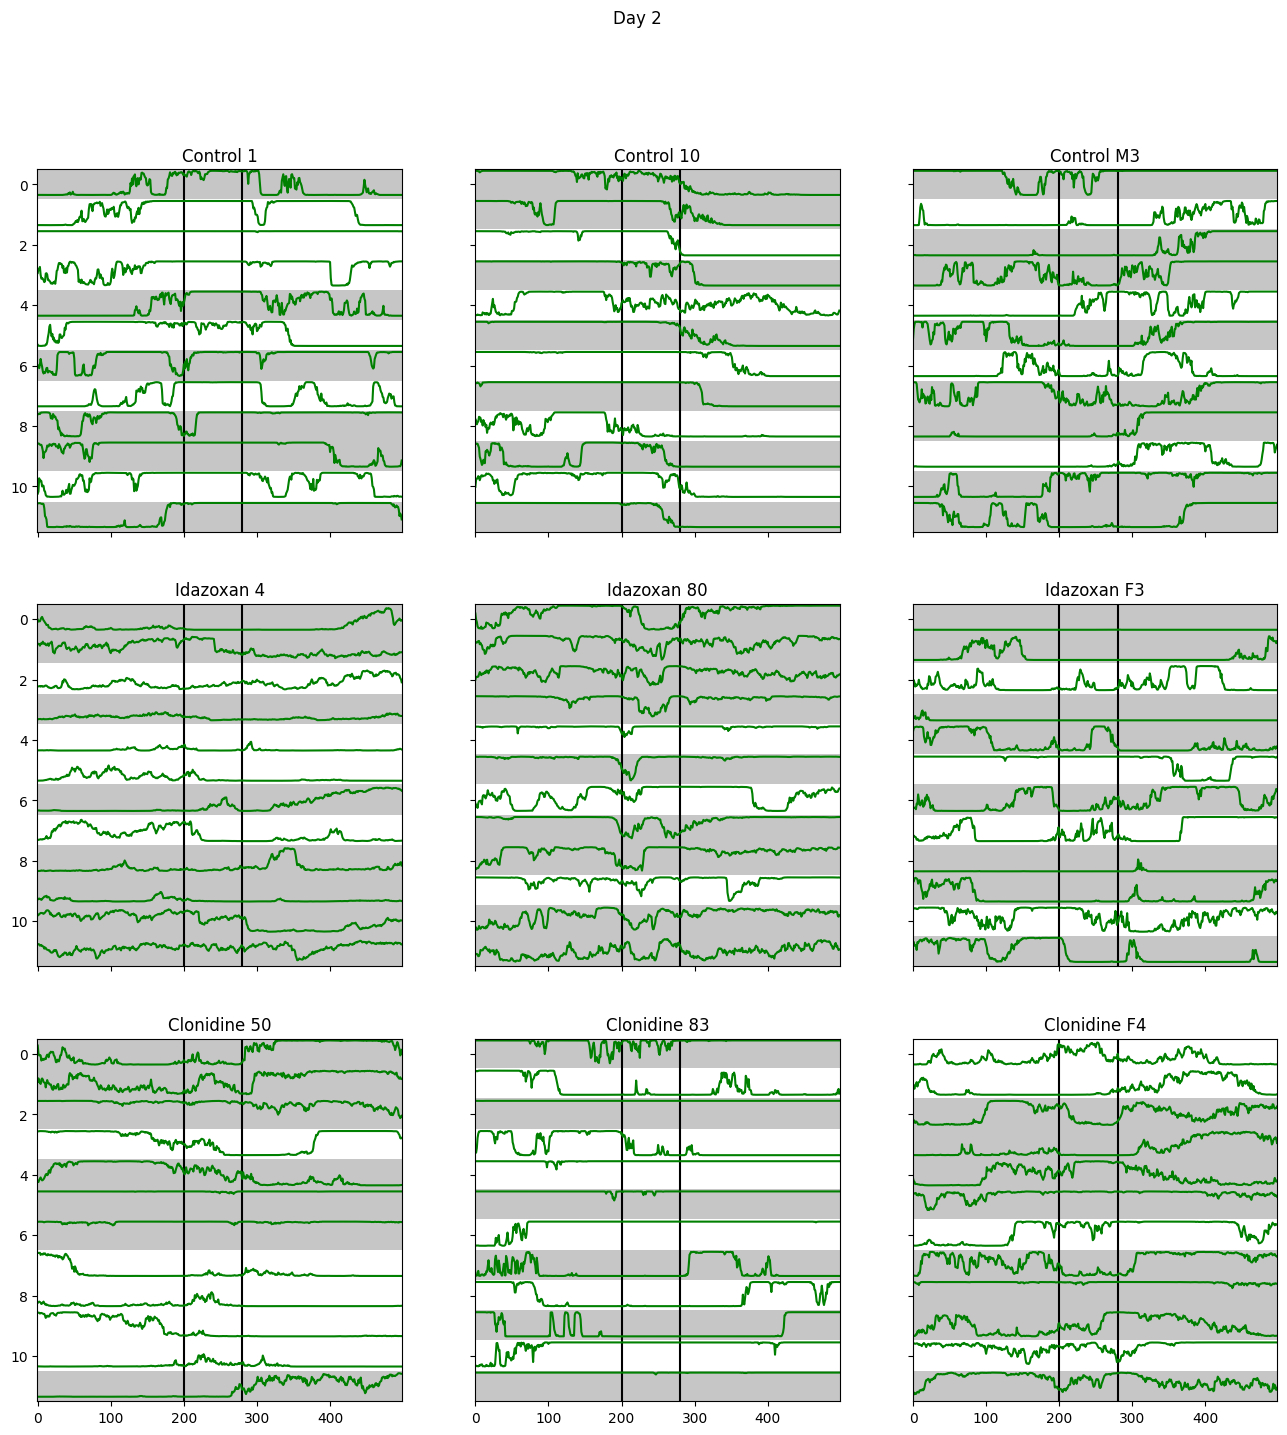

In [6]:
import numpy as np
fig, axes = plt.subplots(3, 3, figsize = (16,16), sharex = True, sharey = True)
certain_counts_d7 = {}

day = 'Day 2'
res = day2results
for idx, k in enumerate(res[list(res.keys())[0]][1].keys()):
    y_test, y_preds_test, y_preds_test_proba = res[list(res.keys())[0]][1][k]
    y_test = y_test.reshape((12,-1))
    y_preds_test = y_preds_test.reshape((12,-1))
    y_preds_test_proba = y_preds_test_proba[:,0].reshape((12,-1))

    i,j = divmod(idx, 3)

    axes[i,j].imshow(y_test, aspect = 'auto', interpolation = 'none', cmap = 'Greys', vmin = 0, vmax = 3)
    axes[i,j].axvline(x = 200, color = 'black')
    axes[i,j].axvline(x = 280, color = 'black')
    xx = range(len(y_preds_test_proba[0]))
    for t in range(12):
        axes[i,j].plot(xx, 0.8*y_preds_test_proba[t]+t-0.45, color = 'green')
    y_preds_test_proba_certain = (y_preds_test_proba > certain_thresh).astype(int)
    y_preds_test_proba_certainnot = (y_preds_test_proba < certainnot_thresh).astype(int)
    certain_counts_d7[k] = np.sum(np.diff(y_preds_test_proba_certain, axis = 1) == 1, axis = 1) + \
                           np.sum(np.diff(y_preds_test_proba_certainnot, axis = 1) == 1, axis = 1)
    title = f"{k[0]} {k[1]}"
    axes[i,j].set_title(title)
fig.suptitle(day)


Text(0.5, 0.98, 'Day 6')

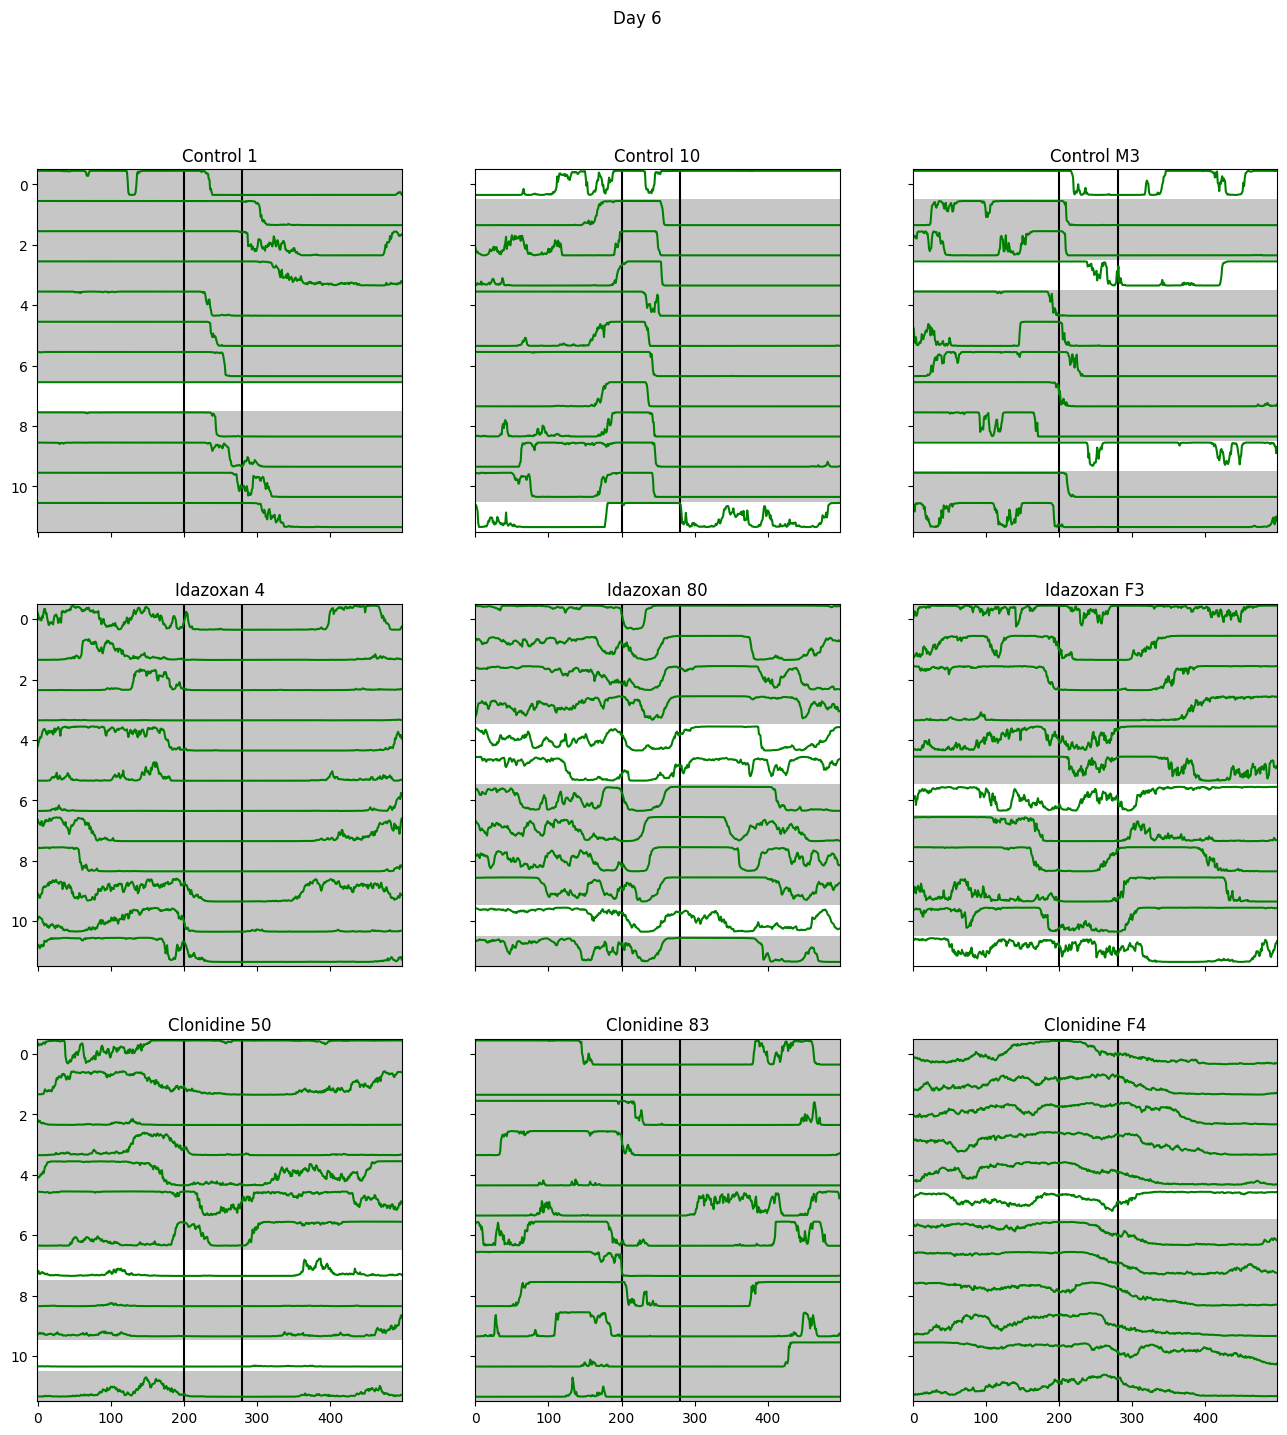

In [7]:
import numpy as np
fig, axes = plt.subplots(3, 3, figsize = (16,16), sharex = True, sharey = True)
certain_counts_d9 = {}
day = 'Day 6'
res = day6results
for idx, k in enumerate(res[list(res.keys())[0]][1].keys()):
    y_test, y_preds_test, y_preds_test_proba = res[list(res.keys())[0]][1][k]
    y_test = y_test.reshape((12,-1))
    y_preds_test = y_preds_test.reshape((12,-1))
    y_preds_test_proba = y_preds_test_proba[:,0].reshape((12,-1))

    i,j = divmod(idx, 3)

    axes[i,j].imshow(y_test, aspect = 'auto', interpolation = 'none', cmap = 'Greys', vmin = 0, vmax = 3)
    axes[i,j].axvline(x = 200, color = 'black')
    axes[i,j].axvline(x = 280, color = 'black')
    xx = range(len(y_preds_test_proba[0]))
    for t in range(12):
        axes[i,j].plot(xx, 0.8*y_preds_test_proba[t]+t-0.45, color = 'green')
    y_preds_test_proba_certain = (y_preds_test_proba > 0.99).astype(int)
    y_preds_test_proba_certainnot = (y_preds_test_proba < 0.01).astype(int)
    certain_counts_d9[k] = np.sum(np.diff(y_preds_test_proba_certain, axis = 1) == 1, axis = 1) + \
                           np.sum(np.diff(y_preds_test_proba_certainnot, axis = 1) == 1, axis = 1)
    title = f"{k[0]} {k[1]}"
    axes[i,j].set_title(title)
fig.suptitle(day)


### Summarize results

In [8]:
def summarize_results(results_d7, results_d9, key):
    results = pd.concat([results_d7, results_d9])
    results['Session'] = results['Session_trial'].str.split('_').str[0]
    results['Pred_reward_trial'] = (results['Prop_pred_reward_trial'] > 0.5).astype(float)    
    df = results[['treatment', 'animal', 'val_accuracy', 'test_accuracy']].drop_duplicates()
    df['start_frame'] = key[0]
    df['end_frame'] = key[1]
    return df[['start_frame', 'end_frame', 'val_accuracy', 'test_accuracy']].mean(), df

In [11]:
list(day2results.keys())[0]

("Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=20)),\n                ('lda', LinearDiscriminantAnalysis())])",
 (201, 240))

In [13]:
mean_results, df_results = summarize_results(day2results[list(day2results.keys())[0]][0], day2results[list(day2results.keys())[0]][0], (201, 240))
df_results
df_results

,treatment,animal,val_accuracy,test_accuracy,start_frame,end_frame
0,Control,1,0.738462,0.452991,201,240
0,Control,10,0.643846,0.713675,201,240
0,Control,M3,0.627949,0.491453,201,240
0,Idazoxan,4,0.532308,0.519231,201,240
0,Idazoxan,80,0.654872,0.427350,201,240
0,Idazoxan,F3,0.526667,0.166667,201,240
0,Clonidine,50,0.668718,0.739316,201,240
0,Clonidine,83,0.752051,0.559829,201,240
0,Clonidine,F4,0.480513,0.427350,201,240


In [16]:
mean_results, df_results = summarize_results(day7results[list(day7results.keys())[0]][0], day7results[list(day7results.keys())[0]][0], (201, 240))
df_results

,treatment,animal,val_accuracy,test_accuracy,start_frame,end_frame
0,Control,1,0.873846,0.591880,201,240
0,Control,10,0.748718,0.467949,201,240
0,Control,M3,0.720000,0.619658,201,240
0,Idazoxan,4,0.842051,0.205128,201,240
0,Idazoxan,80,0.754872,0.779915,201,240
0,Idazoxan,F3,0.860000,0.465812,201,240
0,Clonidine,50,0.803077,0.363248,201,240
0,Clonidine,83,0.687692,0.316239,201,240
0,Clonidine,F4,0.753333,0.250000,201,240


## Count number of switches between certain predictions

In [29]:
certain_counts_d9

{('Control', '1'): array([ 8,  6, 12, 15, 18, 10, 13, 20, 14,  3, 18,  2]),
 ('Control', '10'): array([24, 15,  8,  6,  3,  6,  5,  8,  2,  7, 16,  4]),
 ('Control', 'M3'): array([ 7,  6,  1, 10,  4,  9, 10,  8, 10,  5, 23,  4]),
 ('Idazoxan', '4'): array([21,  6,  5,  2,  8, 23, 18, 13,  6, 11,  2,  9]),
 ('Idazoxan', '80'): array([18,  8, 27,  8,  9, 16, 12, 10, 18, 18, 14, 12]),
 ('Idazoxan', 'F3'): array([ 0,  5,  0,  0,  9, 10, 22,  9,  0, 14, 13,  0]),
 ('Clonidine', '50'): array([ 9,  8,  9, 13,  2,  2,  6,  6, 11,  7, 13, 12]),
 ('Clonidine', '83'): array([ 9, 16,  1,  9, 15,  2,  9,  2,  5,  3,  8,  5]),
 ('Clonidine', 'F4'): array([ 1, 12,  9,  5,  6,  1,  4,  8,  6,  5,  8,  5])}

In [33]:
for k in certain_counts_d7:
    print(k, 'mean periods', np.mean(certain_counts_d7[k]))

('Control', '1') mean periods 10.416666666666666
('Control', '10') mean periods 7.166666666666667
('Control', 'M3') mean periods 9.916666666666666
('Idazoxan', '4') mean periods 9.916666666666666
('Idazoxan', '80') mean periods 10.333333333333334
('Idazoxan', 'F3') mean periods 15.25
('Clonidine', '50') mean periods 7.0
('Clonidine', '83') mean periods 11.666666666666666
('Clonidine', 'F4') mean periods 6.416666666666667


In [32]:
for k in certain_counts_d9:
    print(k, 'mean periods', np.mean(certain_counts_d9[k]))

('Control', '1') mean periods 11.583333333333334
('Control', '10') mean periods 8.666666666666666
('Control', 'M3') mean periods 8.083333333333334
('Idazoxan', '4') mean periods 10.333333333333334
('Idazoxan', '80') mean periods 14.166666666666666
('Idazoxan', 'F3') mean periods 6.833333333333333
('Clonidine', '50') mean periods 8.166666666666666
('Clonidine', '83') mean periods 7.0
('Clonidine', 'F4') mean periods 5.833333333333333
